<a href="https://colab.research.google.com/github/ngg2000/Vanadium-Redox-Battery/blob/main/TP_Aero_Teorica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP 3 Flujo Potencial Bidimensional

## Problem 3

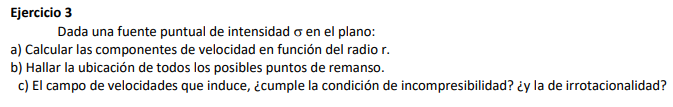

In [ ]:
import math
import numpy as np
from matplotlib import pyplot
import sympy
from sympy.abc import x,y,a,b

### Ejercicio a)

In [ ]:
vr = sympy.diff(a / (2 * b) * sympy.ln(x),x)

Sea a = $\sigma$ y b = $\pi$

Sea x = r

Sea y = $\theta$

In [ ]:
print('vr = ', str(vr) , )

vr =  a/(2*b*x)


In [ ]:
vtheta = 0
print('vtheta = ', str(vtheta) , )

vtheta =  0


### Ejercicio b

In [ ]:
from sympy import limit,oo,symbols

In [ ]:
limit(vr,x,oo)

0

In [ ]:
limit(vr,x,0)

oo*sign(a/b)

Sea sign ($\frac{a}{b} >0$), luego esto da infinito positivo.

### Ejercicio c)

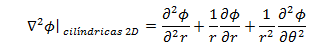

Verificación de incompresibilidad.

In [ ]:
laplaciano = sympy.diff(a / (2 * b) * sympy.ln(x),x,2)+ 1 / x * vr + 1 / x**2 * 0

Verificación de irrotacionalidad.

In [ ]:
from sympy.vector import curl, CoordSys3D, CoordSysCartesian

In [ ]:
def polar_to_cartesian(r, theta): # 'def' nos permite 'crear' nuestras propias funciones en Python.
   xx = r * sympy.cos(theta)
   yy = r * sympy.sin(theta)
   return(xx, yy)

def cartesian_to_polar(x, y): 
   rr = sympy.sqrt(x**2 + y**2)
   theta = sympy.atan2(y, x)
   return(rr, theta)

Intento fallido, sale hacerlo a mano con el Malvern a lado al mejor estilo MdCA.

## Problem 4

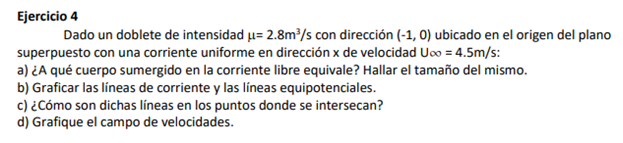

In [ ]:
u_inf = 4.5

Creando un mallado de puntos para el doblete.

In [ ]:
N = 100
x_start, x_end = -2.0, 2.0
y_start, y_end = -1.0, 1.0
x = np.linspace(x_start, x_end, N)
y = np.linspace(y_start, y_end, N)
X, Y = np.meshgrid(x, y)

Ingreso el $\mu$ y el punto donde se localiza el doblete (origen).

In [ ]:
mu = 2.8
x_doublet, y_doublet = 0.0, 0.0

Defino una función para obtener la velocidad y la función de corriente en coordenadas cartesianas.

In [ ]:
def get_velocity_doublet(strength, xd, yd, X, Y):
  u = (- mu / (2 * math.pi)) * ((X - xd)**2 - (Y - yd)**2) /((X - xd)**2 + (Y - yd)**2)**2 
  v = (- mu / (2 * math.pi)) * 2 * (X - xd) * (Y - yd) /((X - xd)**2 + (Y - yd)**2)**2
  return u, v
def get_stream_function_doublet(strength, xd, yd, X, Y):
  psi = ( - mu /(2 * math.pi)) * (Y - yd) /((X - xd)**2 + (Y - yd)**2)**2
  return psi

In [ ]:
u_doublet, v_doublet = get_velocity_doublet(mu, x_doublet, y_doublet, X, Y)
psi_doublet = get_stream_function_doublet(mu, x_doublet, y_doublet, X, Y)

In [ ]:
%matplotlib inline

El doblete no inmerso en una corriente libre.

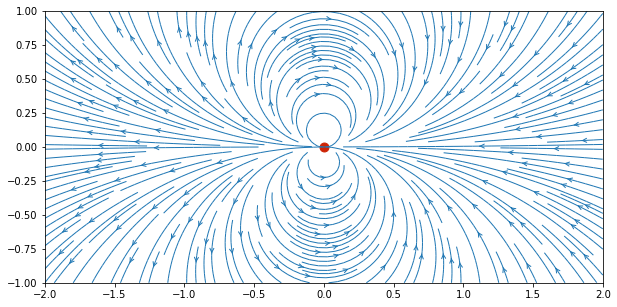

In [ ]:
width = 10
height = (y_end - y_start)/(x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel = ('x')
pyplot.ylabel = ('y')
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u_doublet, v_doublet, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o')

Defino la velocidad de la corriente libre, teniendo en cuenta que tiene dirección de $+ x $

In [ ]:
u_freestream = u_inf * np.ones((N,N), dtype=float)
v_freestream = np.zeros((N,N), dtype=float)
psi_freestream = u_inf * Y*10

/usr/local/lib/python3.7/dist-packages/matplotlib/patches.py:3287: RuntimeWarning: invalid value encountered in double_scalars
  cos_t, sin_t = head_length / head_dist, head_width / head_dist
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: The following kwargs were not used by contour: 'linewidth'
  del sys.path[0]


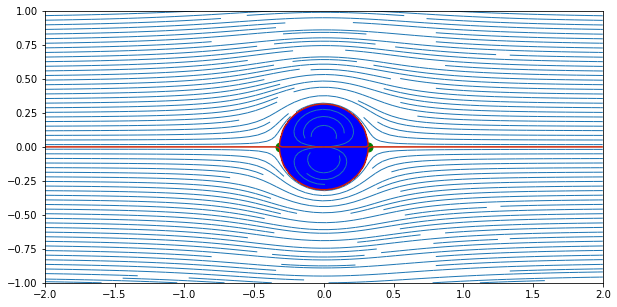

In [ ]:
u = u_freestream + u_doublet
v = v_freestream + v_doublet
psi = psi_freestream + psi_doublet
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel = ('x')
pyplot.ylabel = ('y')
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=0)
pyplot.contour(X, Y, psi,
               levels=[0.], colors='#CD2305', linewidth=1, linestyles='solid')
pyplot.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o')
x_stagn1, y_stagn1 = +math.sqrt(mu / (2 * math.pi * u_inf)), 0.0
x_stagn2, y_stagn2 = -math.sqrt(mu / (2 * math.pi * u_inf)), 0.0
pyplot.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2],
               color='g', s=80, marker='o');
pyplot.contourf(X, Y, np.sqrt((X**2 + Y**2)/0.1), levels=[0., 1], colors='b')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: The following kwargs were not used by contour: 'linewidth'
  if sys.path[0] == '':


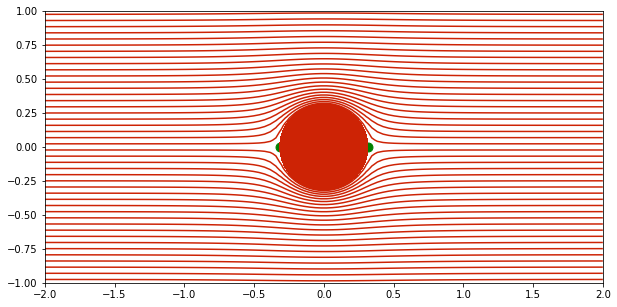

In [ ]:
u = u_freestream + u_doublet
v = v_freestream + v_doublet
psi = psi_freestream + psi_doublet
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel = ('x')
pyplot.ylabel = ('y')
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.contour(X, Y, psi,
               levels=np.array(np.linspace(-50, 50, 50)), colors='#CD2305', linewidth=1, linestyles='solid')
pyplot.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o')
x_stagn1, y_stagn1 = +math.sqrt(mu / (2 * math.pi * u_inf)), 0.0
x_stagn2, y_stagn2 = -math.sqrt(mu / (2 * math.pi * u_inf)), 0.0
pyplot.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2],
               color='g', s=80, marker='o');
pyplot.contourf(X, Y, np.sqrt((X**2 + Y**2)/0.1), levels=[0., 1], colors='#CD2305')

In [ ]:
def get_potential_function_doublet(strength, xd, yd, X, Y):
  phi = mu / (2 * math.pi) *((X - xd) /((X - xd)**2 + (Y - yd)**2)**2)
  return phi

In [ ]:
phi_doublet = get_potential_function_doublet(mu, x_doublet, y_doublet, X, Y)
phi_freestream = u_inf * X
phi = phi_freestream + phi_doublet

Gráfico lineas equipotenciales

In [ ]:
x1_start, x1_end = -0.25, 0.25
y1_start, y1_end = -0.25, 0.22
x1 = np.linspace(x_start, x_end, 10)
y1 = np.linspace(y_start, y_end, 10)
X1, Y1 = np.meshgrid(x, y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: The following kwargs were not used by contour: 'linewidth'
  import sys


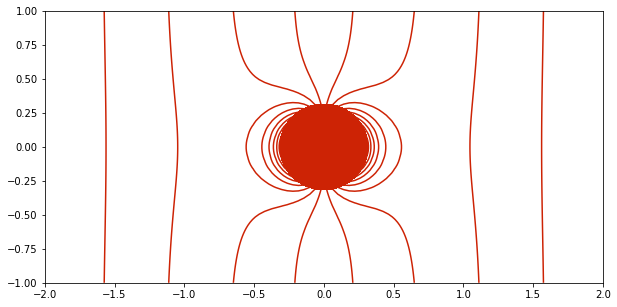

In [ ]:
pyplot.figure(figsize=(width, height))
pyplot.xlabel = ('x')
pyplot.ylabel = ('y')
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.contour(X, Y, phi,
               levels=np.array(np.linspace(-50, 50, 50)), colors='#CD2305', linewidth=1, linestyles='solid')
pyplot.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o')
x_stagn1, y_stagn1 = +math.sqrt(mu / (2 * math.pi * u_inf)), 0.0
x_stagn2, y_stagn2 = -math.sqrt(mu / (2 * math.pi * u_inf)), 0.0
pyplot.contourf(X, Y, np.sqrt((X**2 + Y**2)/0.1), levels=[0., 1], colors='#CD2305')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: The following kwargs were not used by contour: 'linewidth'
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: The following kwargs were not used by contour: 'linewidth'
  # This is added back by InteractiveShellApp.init_path()


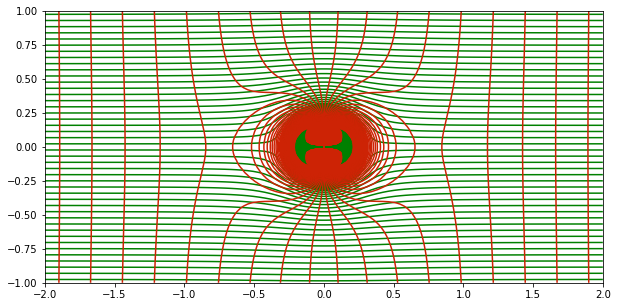

In [ ]:
pyplot.figure(figsize=(width, height))
pyplot.xlabel = ('x')
pyplot.ylabel = ('y')
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.contourf(X, Y, np.sqrt((X**2 + Y**2)/0.1), levels=[0., 1], colors='#CD2305')
pyplot.contour(X, Y, psi,
               levels=np.array(np.linspace(-50, 50, 50)), colors='g', linewidth=1, linestyles='solid')
pyplot.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o')
pyplot.contour(X, Y, phi,
               levels=np.array(np.linspace(-50, 50, 100)), colors='#CD2305', linewidth=1, linestyles='solid')
pyplot.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o')

## Problem 5

Sea $y=\theta$, sin tener nada que ver con el $y$ de los ejes cartesianos

In [ ]:
from sympy.abc import x, y, c, a, r,j
psi = c / r**3 * sympy.sin(3 * j)

In [ ]:
dpsidr = sympy.diff(psi,r)

In [ ]:
dpsidr

-3*c*sin(3*j)/r**4

In [ ]:
d2psidr2 = sympy.diff(psi,r,2)
d2psidr2

12*c*sin(3*j)/r**5

In [ ]:
d2psidj2 = sympy.diff(psi,j,2)
d2psidj2

-9*c*sin(3*j)/r**3

In [ ]:
dpsidj = sympy.diff(psi,j)
dpsidj

3*c*cos(3*j)/r**3

In [ ]:
1/r*dpsidj

3*c*cos(3*j)/r**4

In [ ]:
sympy.integrate(dpsidj*1/r,r)

-c*cos(3*j)/r**3

In [ ]:
sympy.integrate(-dpsidr*r,j)

-c*cos(3*j)/r**3

In [ ]:
N = 100
x_start, x_end = -2.0, 2.0
y_start, y_end = -1.0, 1.0
x = np.linspace(x_start, x_end, N)
y = np.linspace(y_start, y_end, N)
X, Y = np.meshgrid(x, y)

In [ ]:
c = 4
j = np.arctan(Y/X)
r = np.sqrt(X**2 + Y**2)

In [ ]:
vr6 = 3*c /(r**4) * np.cos(3 * j)
vj6 = 3*c/(r**4) * np.sin(3 * j)

Gráfico campo de velocidades.

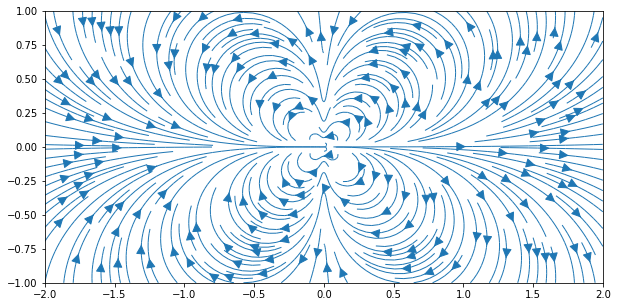

In [ ]:
pyplot.figure(figsize=(width, height))
pyplot.xlabel = ('x')
pyplot.ylabel = ('y')
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, vr6, vj6, density=2, linewidth=1, arrowsize=2)

## Problem 6

In [ ]:
del v, u, vr6, vr, vj6, v_doublet, u_doublet, u_freestream, v_freestream, phi, phi_doublet, phi_freestream, psi_doublet, psi_freestream

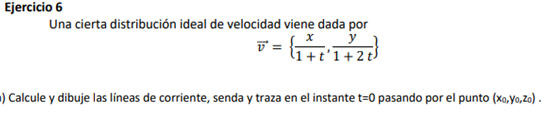

In [ ]:
from sympy.abc import t, x, y, a
u = x /(1 + t)
v = y / (1 + 2*t)

Condiciones del ejercicio:
* $t = 0$
* $(x,y,z) = (x_0,y_0,z_0)$

In [ ]:
sympy.integrate(1/u,(x,a,x))

-(t + 1)*log(a) + (t + 1)*log(x)

In [ ]:
sympy.integrate(1/v,(y,a,y))

-(2*t + 1)*log(a) + (2*t + 1)*log(y)

In [ ]:
x = np.linspace(-2,2,50)
t = np.ones(50) * 0
t1 = np.ones(50) * 1
t2 = np.ones(50) * 2
t3 = np.ones(50) * 3
c = np.power(x,(1 + t/1 + 2*t))
c1 = np.ones(50) * 3 * np.power(x,(1 + t1/1 + 2*t1))
c2 = np.ones(50) * 3 * np.power(x,(1 + t2/1 + 2*t2))
c3 = np.ones(50) * 3 * np.power(x,(1 + t3/1 + 2*t3))

Gráfico línea de corriente con C5=3

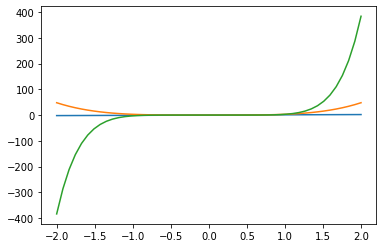

In [ ]:
import pylab as pl
pl.plot(x,c)
pl.plot(x,c1)
pl.plot(x,c2)
pl.show()

In [ ]:
sympy.integrate(1/(2*a+1),(a,0,a))

log(2*a + 1)/2

Gráfico trayectoria

$x_o = 1$
$y_o = 1$

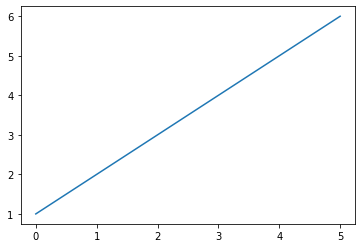

In [ ]:
t = np.linspace(0,5,50)
x = np.ones(50) + t
pl.plot(t,x)
pl.show()

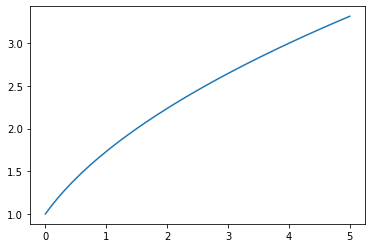

In [ ]:
y = np.sqrt(np.ones(50) * 1 + 2 * t)
pl.plot(t,y)
pl.show()

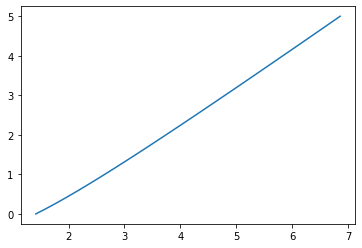

In [ ]:
senda = np.sqrt(np.power(x,2) + np.power(y,2))
pl.plot(senda,t)
pl.show()

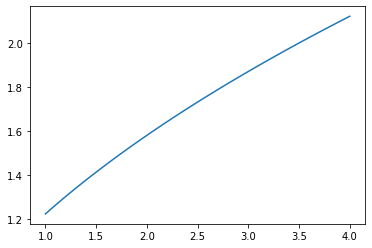

In [ ]:
x = np.linspace(0,4,50)
y = np.sqrt(x + np.ones(50) * 1/2)
pl.plot(x,y)
pl.show()

## Problem 8

Óvalo de Rankine

In [ ]:
u_inf = 2.5
sigma = 10
x = np.linspace(-4, 4, N)
y = np.linspace(-10, 10, N)
X, Y = np.meshgrid(x, y)
x0 = 1 * np.ones(N)
y0 = np.ones(N) * 5
r1 = np.sqrt(np.power(X + x0, 2) + np.power(Y - y0, 2))
r2 = np.sqrt(np.power(X - x0, 2) + np.power(Y - y0, 2))
phi_freestream = u_inf * X
psi_freestream = u_inf * Y

In [ ]:
theta1 = np.arctan((Y - y0)/(X + x0))
theta2 = np.arctan((Y - y0)/(X - x0))

In [ ]:
phi_rankine = phi_freestream + sigma /(2 * math.pi) * np.log(r1) - sigma/(2 * math.pi) * np.log(r2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: The following kwargs were not used by contour: 'linewidth'
  import sys


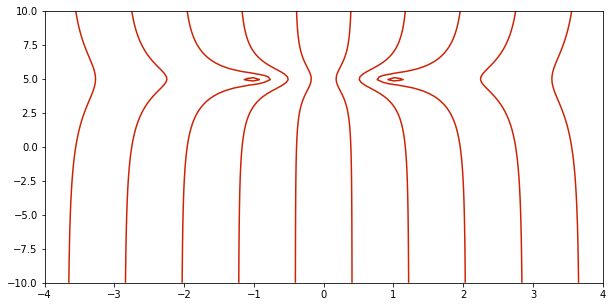

In [ ]:
pyplot.figure(figsize=(width, height))
pyplot.xlabel = ('x')
pyplot.ylabel = ('y')
pyplot.xlim(-4, 4)
pyplot.ylim(-10, 10)
pyplot.contour(X, Y, phi_rankine,
               levels=np.array(np.linspace(-50, 50, 50)), colors='#CD2305', linewidth=1, linestyles='solid')

In [ ]:
sigma = 10
psi_rankine = psi_freestream + sigma/(2 * math.pi) * theta1 - sigma/(2 * math.pi) * theta2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: The following kwargs were not used by contour: 'linewidth'
  import sys


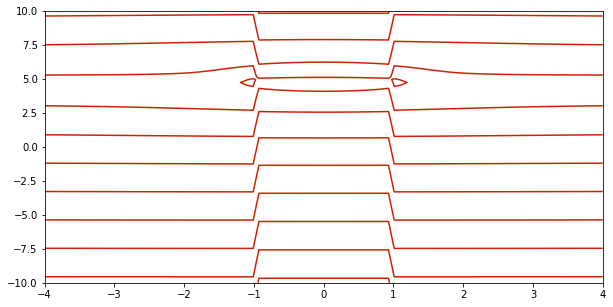

In [ ]:
pyplot.figure(figsize=(width, height))
pyplot.xlabel = ('x')
pyplot.ylabel = ('y')
pyplot.xlim(-4, 4)
pyplot.ylim(-10, 10)
pyplot.contour(X, Y, psi_rankine,
               levels=np.array(np.linspace(-50, 50, 20)), colors='#CD2305', linewidth=1, linestyles='solid')

Huele a problemas.

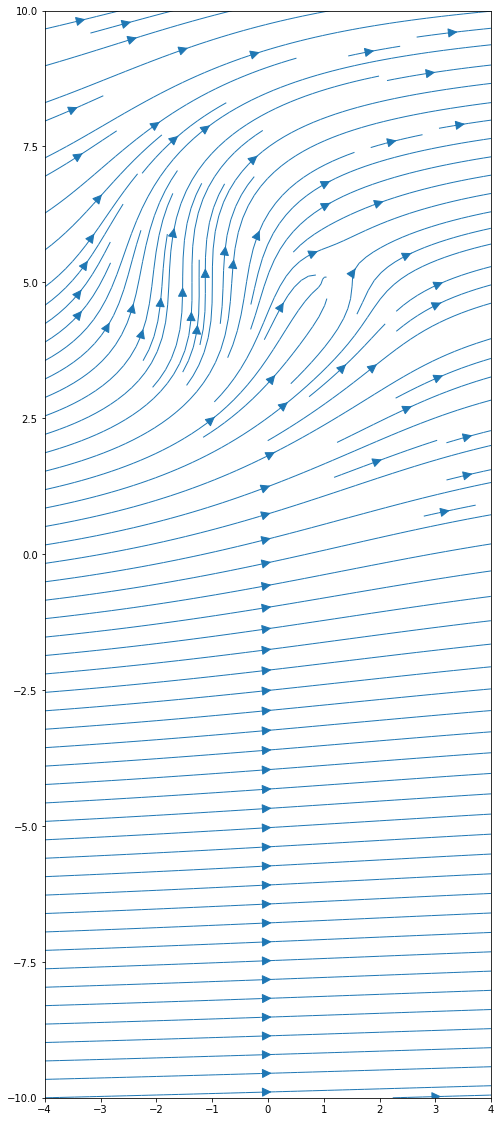

In [ ]:
u = u_inf * np.ones((N,N), dtype=float)  + sigma/(2 * math.pi) *(X + x0)/(np.power(r1,2)) - sigma/(2 * math.pi) * (X - x0)/(np.power(r2,2))
v = u_inf * np.zeros((N,N), dtype=float) + sigma/(2 * math.pi) *(Y + y0)/(np.power(r1,2)) - sigma/(2 * math.pi) * (Y - y0)/(np.power(r2,2))
pyplot.figure(figsize=(8, 20))
pyplot.xlabel = ('x')
pyplot.ylabel = ('y')
pyplot.xlim(-4, 4)
pyplot.ylim(-10, 10)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=2)

Se ve mal porque acá es necesario el análisis complejo. Mudanza temporal al Wolfram con el código base de Meroniuc.

## Problem 9

In [ ]:
del x
from sympy.abc import x
sympy.integrate(1/(- 2 - 1.2*x),x)

-0.833333333333333*log(1.2*x + 2.0)

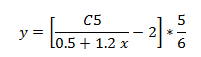

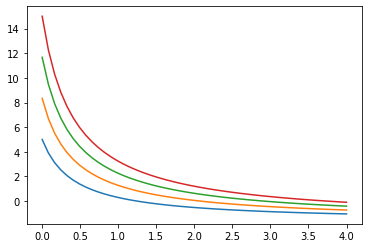

In [ ]:
x = np.linspace(0,4,50)
C5 = np.ones(50) * 4
y = 5/6 * (C5 /(0.5 * np.ones(50) + 1.2*x)- np.ones(50) * 2)
pl.plot(x,y)
C6 = np.ones(50) * 6
y6 = 5/6 * (C6 /(0.5 * np.ones(50) + 1.2*x)- np.ones(50) * 2)
pl.plot(x,y6)
C7 = np.ones(50) * 8
y7 = 5/6 * (C7 /(0.5 * np.ones(50) + 1.2*x)- np.ones(50) * 2)
pl.plot(x,y7)
C9 = np.ones(50) * 10
y9 = 5/6 * (C9 /(0.5 * np.ones(50) + 1.2*x)- np.ones(50) * 2)
pl.plot(x,y9)
pl.show()

#Apéndice

##Ejemplo